In [1]:
import pandas as pd
from utils import load_data

# EDA for AMZN Historical Data

In [2]:
# Load the data
df = load_data('AMZN_historical_data.csv', base_dir='../data/yfinance_data')

# Summary statistics for all numeric columns
summary_stats = df.describe()

# Missing value report
missing_values = df.isna().sum()

# List columns with >5% nulls
threshold = 0.05 * len(df)
columns_with_many_nulls = missing_values[missing_values > threshold].index.tolist()

print("Summary Statistics:\n", summary_stats)
print("\nMissing Value Report:\n", missing_values)
print("\nColumns with >5% nulls:\n", columns_with_many_nulls)

Summary Statistics:
               Open         High          Low        Close    Adj Close  \
count  6846.000000  6846.000000  6846.000000  6846.000000  6846.000000   
mean     37.360464    37.801009    36.882561    37.351096    37.351096   
std      53.756955    54.366449    53.087051    53.729913    53.729913   
min       0.070313     0.072396     0.065625     0.069792     0.069792   
25%       2.070125     2.120625     2.040156     2.076750     2.076750   
50%       8.574500     8.666750     8.466500     8.591500     8.591500   
75%      50.453876    50.723249    50.059875    50.426500    50.426500   
max     200.089996   201.199997   199.050003   200.000000   200.000000   

             Volume  Dividends  Stock Splits  
count  6.846000e+03     6846.0   6846.000000  
mean   1.380713e+08        0.0      0.003944  
std    1.382346e+08        0.0      0.246789  
min    9.744000e+06        0.0      0.000000  
25%    6.505442e+07        0.0      0.000000  
50%    1.020650e+08        0.0

# Technical Analysis Indicators with TA-Lib
This section demonstrates how to calculate and analyze common technical indicators such as Moving Averages, RSI, and MACD using TA-Lib on AMZN historical data.

In [3]:
import talib
# Calculate 20-day and 50-day Simple Moving Averages (SMA)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Calculate Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Display the last few rows to show the new indicator columns
df[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail()

,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
6841,180.830002,192.8900,187.364001,37.221397,-1.342010,0.635114,-1.977124
6842,179.850006,192.2020,187.229601,36.132394,-1.878483,0.132395,-2.010878
6843,182.500000,191.4345,187.138200,41.146719,-2.065994,-0.307283,-1.758711
6844,183.199997,190.9320,187.082400,42.432437,-2.133520,-0.672530,-1.460990
6845,181.710007,190.1575,187.044000,40.408843,-2.280971,-0.994218,-1.286753


# Visualize Technical Indicators
Visualize the stock price along with SMA, RSI, and MACD to better understand their impact on AMZN price trends.

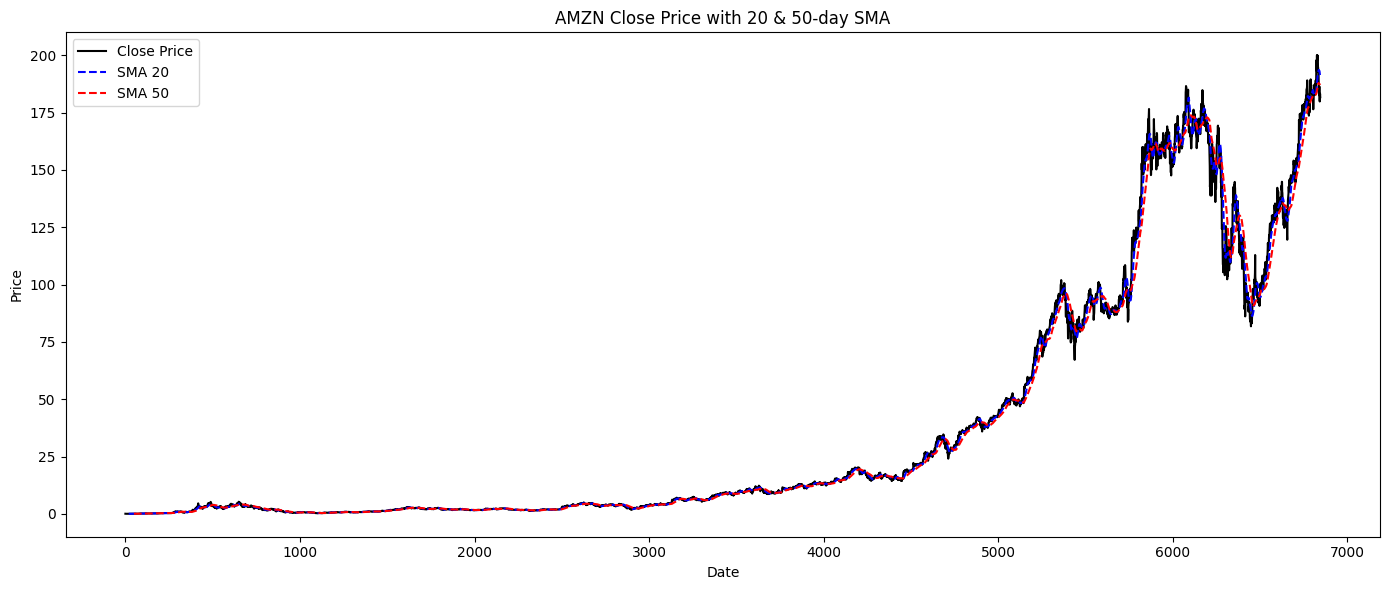

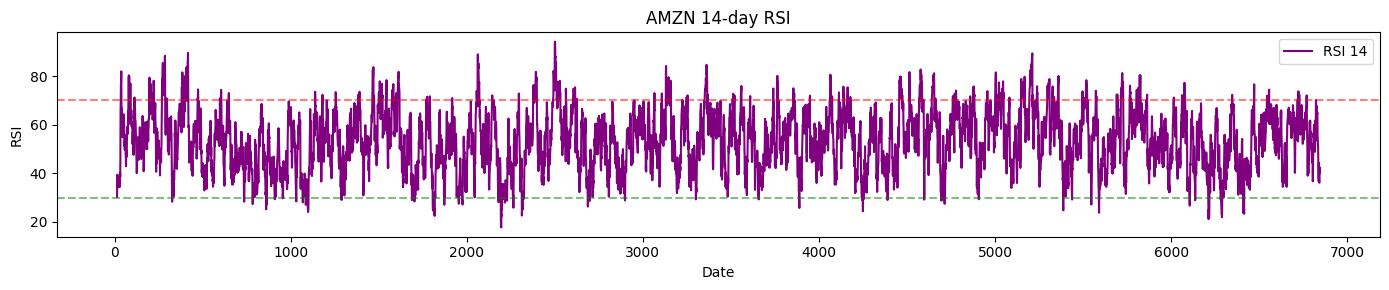

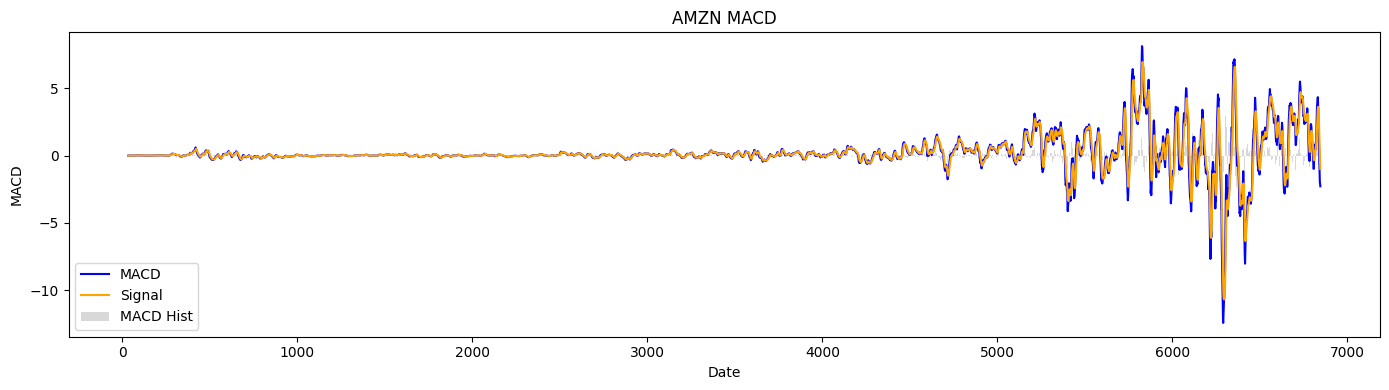

In [4]:
import matplotlib.pyplot as plt

# Plot Close price with SMA overlays
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['SMA_20'], label='SMA 20', color='blue', linestyle='--')
plt.plot(df['SMA_50'], label='SMA 50', color='red', linestyle='--')
plt.title('AMZN Close Price with 20 & 50-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('AMZN 14-day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()

# Plot MACD and Signal
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal', color='orange')
plt.bar(df.index, df['MACD_Hist'], label='MACD Hist', color='gray', alpha=0.3)
plt.title('AMZN MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.tight_layout()
plt.show()